In [373]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt

In [512]:
housing = pd.read_csv('/Users/jessicajoy/Downloads/housing.csv')

### Top Neighborhood Counts

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, 'NoRidge'),
  Text(1, 0, 'NridgHt'),
  Text(2, 0, 'StoneBr'),
  Text(3, 0, 'GrnHill'),
  Text(4, 0, 'Veenker'),
  Text(5, 0, 'Timber'),
  Text(6, 0, 'Somerst'),
  Text(7, 0, 'ClearCr'),
  Text(8, 0, 'Crawfor'),
  Text(9, 0, 'CollgCr'),
  Text(10, 0, 'Blmngtn'),
  Text(11, 0, 'Greens'),
  Text(12, 0, 'NWAmes'),
  Text(13, 0, 'Gilbert'),
  Text(14, 0, 'SawyerW'),
  Text(15, 0, 'Mitchel'),
  Text(16, 0, 'NAmes'),
  Text(17, 0, 'Blueste'),
  Text(18, 0, 'NPkVill'),
  Text(19, 0, 'Sawyer'),
  Text(20, 0, 'Landmrk'),
  Text(21, 0, 'SWISU'),
  Text(22, 0, 'Edwards'),
  Text(23, 0, 'OldTown'),
  Text(24, 0, 'BrkSide'),
  Text(25, 0, 'IDOTRR'),
  Text(26, 0, 'BrDale'),
  Text(27, 0, 'MeadowV')])

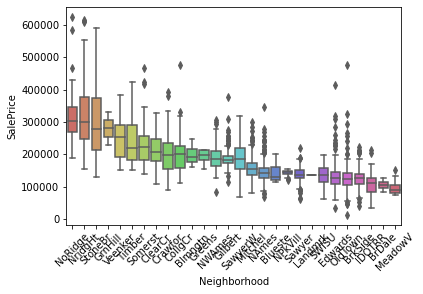

In [453]:
my_order = housing.groupby(by=["Neighborhood"])['SalePrice'].mean().sort_values(ascending=False).index
sns.boxplot(y=housing['SalePrice'], x=housing['Neighborhood'], order=my_order, palette="hls")
plt.xticks(rotation=45)

In [433]:
top= housing.groupby('Neighborhood').agg({'SalePrice':['mean','count'],'GrLivArea':'mean'})
top= top.sort_values(by=('SalePrice','count'),ascending=False).head(10)
top

SalePrice          GrLivArea
                       mean count         mean
Neighborhood                                  
NAmes         145087.258537   410  1287.126829
CollgCr       198133.169492   236  1477.173729
OldTown       126939.018779   213  1427.962441
Edwards       132837.628049   164  1295.048780
Somerst       228761.853147   143  1607.293706
Gilbert       189439.867133   143  1626.902098
Sawyer        137492.863309   139  1187.007194
NWAmes        190372.398374   123  1699.138211
NridgHt       313662.495868   121  1920.471074
SawyerW       188102.000000   113  1622.849558

In [511]:
sum(top['SalePrice','count'])

1805

In [514]:
1805/2578

0.700155159038014

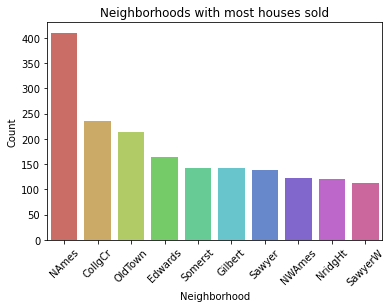

In [434]:
sns.barplot(x=top.index, y=('SalePrice','count'), data=top, palette="hls")
plt.title("Neighborhoods with most houses sold")
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig('neighborhood_count.png')

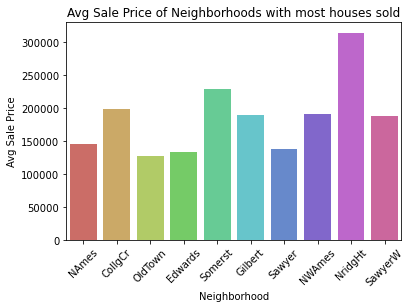

In [435]:
sns.barplot(x=top.index, y=('SalePrice','mean'), data=top, palette="hls")
plt.title("Avg Sale Price of Neighborhoods with most houses sold")
plt.xlabel('Neighborhood')
plt.ylabel('Avg Sale Price')
plt.xticks(rotation=45)
plt.savefig('neighprice_count.png')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'NAmes'),
  Text(1, 0, 'CollgCr'),
  Text(2, 0, 'OldTown'),
  Text(3, 0, 'Edwards'),
  Text(4, 0, 'Somerst'),
  Text(5, 0, 'Gilbert'),
  Text(6, 0, 'Sawyer'),
  Text(7, 0, 'NWAmes'),
  Text(8, 0, 'NridgHt'),
  Text(9, 0, 'SawyerW')])

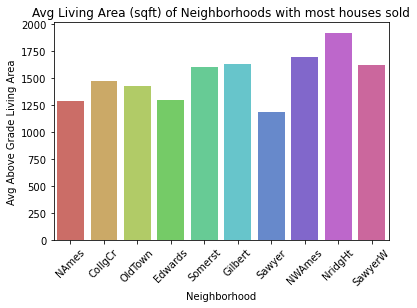

In [436]:
sns.barplot(x=top.index, y=('GrLivArea','mean'), data=top, palette="hls")
plt.title("Avg Living Area (sqft) of Neighborhoods with most houses sold")
plt.xlabel('Neighborhood')
plt.ylabel('Avg Above Grade Living Area')
plt.xticks(rotation=45)

### Heating Quality

In [437]:
df = housing[["Neighborhood", "HeatingQC", "SalePrice"]]

In [438]:
df = pd.pivot_table(data=housing,
                    index='Neighborhood',
                    values='SalePrice',
                    columns='HeatingQC')
df = df.loc[('NAmes', 'CollgCr','OldTown','Edwards','Somerst','Gilbert','Sawyer','NWAmes','NridgHt','SawyerW'), :]

Text(0.5, 15.0, 'Heating Quality')

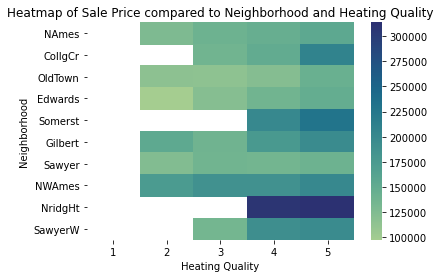

In [439]:
sns.heatmap(df, cmap="crest")
plt.title("Heatmap of Sale Price compared to Neighborhood and Heating Quality")
plt.ylabel('Neighborhood')
plt.xlabel('Heating Quality')

## Basement Analysis:
### BsmtQual, BsmtExposure, BsmtFinType1, BsmtFinSF1, Total BsmtSF

####  Basement quality across Neighborhoods

In [440]:
df1 = housing[["Neighborhood", "BsmtQual", "SalePrice"]]
df1 = pd.pivot_table(data=housing,
                    index='Neighborhood',
                    values='SalePrice',
                    columns='BsmtQual')
df1 = df1.loc[('NAmes', 'CollgCr','OldTown','Edwards','Somerst','Gilbert','Sawyer','NWAmes','NridgHt','SawyerW'), :]

Text(0.5, 15.0, 'Basement Quality')

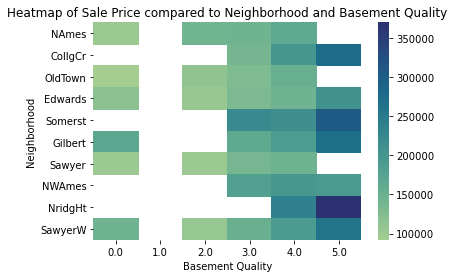

In [441]:
sns.heatmap(df1, cmap="crest")
plt.title("Heatmap of Sale Price compared to Neighborhood and Basement Quality")
plt.ylabel('Neighborhood')
plt.xlabel('Basement Quality')

#### Basement Finish Type

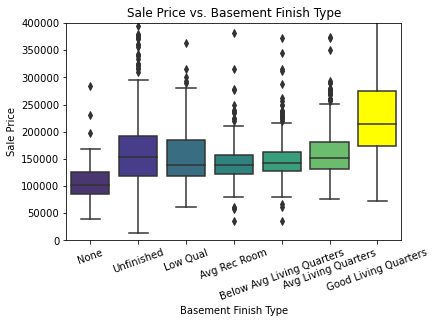

In [494]:
ax= sns.boxplot(x="BsmtFinType1", y="SalePrice", data=housing, palette='viridis')
ax.set_xticklabels(['None','Unfinished','Low Qual', 'Avg Rec Room','Below Avg Living Quarters','Avg Living Quarters','Good Living Quarters'])
plt.title("Sale Price vs. Basement Finish Type")
plt.ylabel('Sale Price')
plt.xlabel('Basement Finish Type')
plt.xticks(rotation=20)
plt.ylim(0,400000)

box7 = ax.artists[6]
box2 = ax.artists[1]
box7.set_facecolor('yellow')
box2.set_facecolor('darkslateblue')




#### Basement Exposure

Text(0.5, 6.79999999999999, 'Basement Exposure')

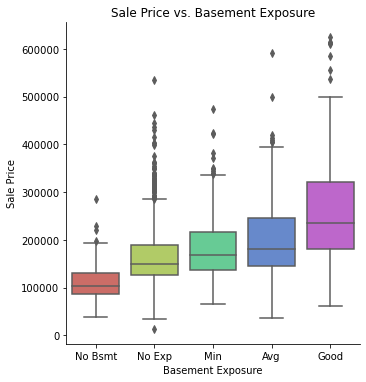

In [443]:
bexp= sns.catplot(x="BsmtExposure", y="SalePrice", kind="box", data=housing, palette="hls")
bexp.set_xticklabels(['No Bsmt','No Exp','Min', 'Avg','Good'])
plt.title("Sale Price vs. Basement Exposure")
plt.ylabel('Sale Price')
plt.xlabel('Basement Exposure')

#### Total Basement SF

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


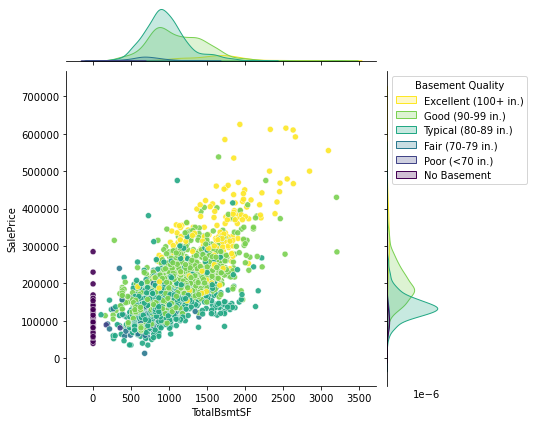

In [458]:
tbsf= sns.jointplot(x=housing["TotalBsmtSF"], y="SalePrice", hue='BsmtQual', 
                    alpha= 0.9, 
                    data=housing, 
                    palette="viridis", 
                    hue_order = ['0.0', '1.0','2.0','3.0','4.0','5.0','6.0'], legend=False)
plt.legend(title='Basement Quality', loc='upper left', labels=['Excellent (100+ in.)','Good (90-99 in.)','Typical (80-89 in.)','Fair (70-79 in.)','Poor (<70 in.)','No Basement' ])


/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


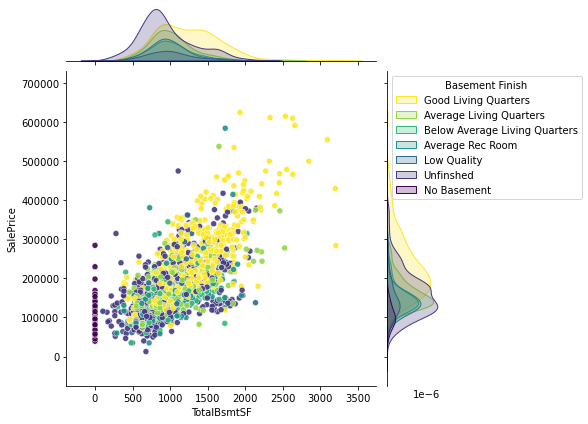

In [460]:
tbsf= sns.jointplot(x=housing["TotalBsmtSF"], y="SalePrice", hue='BsmtFinType1', 
                    alpha= 0.9, 
                    data=housing, 
                    palette="viridis", 
                    hue_order = ['0.0', '1.0','2.0','3.0','4.0','5.0','6.0'], legend=False)
plt.legend(title='Basement Finish', loc='upper left', labels=['Good Living Quarters','Average Living Quarters','Below Average Living Quarters','Average Rec Room','Low Quality','Unfinshed','No Basement' ])

### Type of Driveway

(0.0, 400000.0)

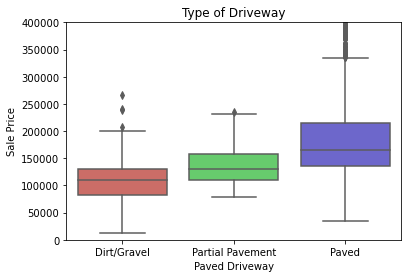

In [499]:
pave = sns.boxplot(x="PavedDrive", y="SalePrice", data=housing, palette="hls")
pave.set_xticklabels(['Dirt/Gravel','Partial Pavement', 'Paved'])
plt.title("Type of Driveway")
plt.xlabel('Paved Driveway')
plt.ylabel('Sale Price')
plt.ylim(0,400000)

### Year Built

In [446]:
housing['YearBuilt'].describe()

count    2578.000000
mean     1970.290535
std        29.718779
min      1872.000000
25%      1953.000000
50%      1972.000000
75%      1999.000000
max      2010.000000
Name: YearBuilt, dtype: float64

In [447]:
years = [] 
for year in housing['YearBuilt']: 
    if year <= 1900: 
        years.append(1) 
    elif year > 1900 and year <= 1950: 
        years.append(2) 
    elif year >= 1951 and year <= 2000: 
        years.append(3)
    else: 
        years.append(4) 

housing['YearRange'] = years

In [448]:
housing['YearRange'].value_counts()

3    1420
4     559
2     549
1      50
Name: YearRange, dtype: int64

Text(-15.450000000000003, 0.5, 'Sale Price')

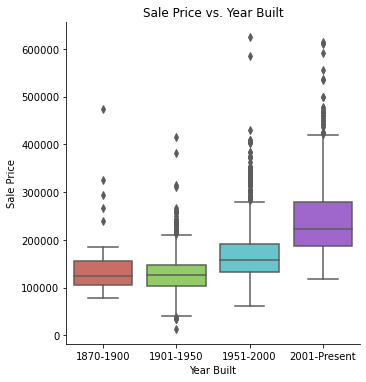

In [449]:
year = sns.catplot(x="YearRange", y="SalePrice", kind="box", data=housing, palette="hls")
year.set_xticklabels(['1870-1900','1901-1950', '1951-2000', '2001-Present'])
plt.title("Sale Price vs. Year Built")
plt.xlabel('Year Built')
plt.ylabel('Sale Price')

Text(0, 0.5, 'Sale Price')

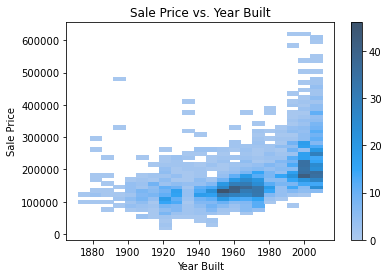

In [450]:
year = sns.histplot(x="YearBuilt", y="SalePrice", cbar=True, data=housing, palette="hls")
plt.title("Sale Price vs. Year Built")
plt.xlabel('Year Built')
plt.ylabel('Sale Price')

### Year and Month Sold

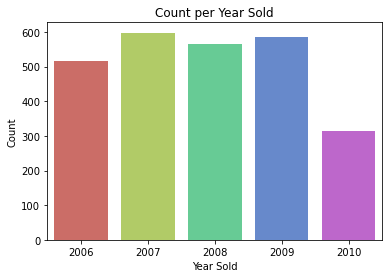

In [451]:
sns.countplot(x="YrSold", data=housing, palette="hls")
plt.title("Count per Year Sold")
plt.xlabel('Year Sold')
plt.ylabel('Count')
plt.savefig('year_count.png')

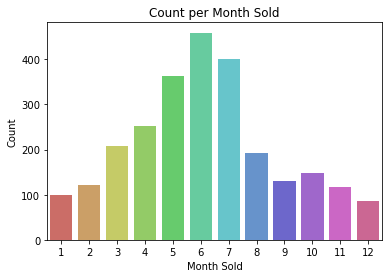

In [452]:
sns.countplot(x="MoSold", data=housing, palette="hls")
plt.title("Count per Month Sold")
plt.xlabel('Month Sold')
plt.ylabel('Count')
plt.savefig('month_count.png')